#### Import modules

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os

#### Read data

In [2]:
counties_graph = nx.read_gml(os.getcwd() + '/Graphs/counties_graph.gml')
states_graph = nx.read_gml(os.getcwd() + '/Graphs/states_graph.gml')

In [3]:
counties_graph.number_of_nodes(), counties_graph.number_of_edges()

(3109, 9247)

In [4]:
states_graph.number_of_nodes(), states_graph.number_of_edges()

(49, 107)

#### Basic Analysis

In [5]:
def basic_analysis(nw, name) -> None:
    """Basic statistics of an undirected network
    Parameters:
        nw (NetworkX Graph): an undirected graph
        name (str): the name of the network
    Returns:
        None"""
    
    print('Network: {}'.format(name))
    print('\n')
    print(nx.info(nw))
    print('Density:', nx.density(nw))

    print('Avg Degree:', np.mean([d for _, d in nw.degree()]))
    print('Median Degree:', np.median([d for _, d in nw.degree()]))
    deg_dict = dict(nw.degree())
    max_deg, min_deg = max(deg_dict.values()), min(deg_dict.values())
    print('Max Degree:', max_deg)
    print('Nodes with max degree:', [n for n in deg_dict if deg_dict[n] == max_deg])
    print('Min Degree:', min_deg)
    print('Nodes with min degree:', [n for n in deg_dict if deg_dict[n] == min_deg])

In [6]:
basic_analysis(states_graph, 'US States')

Network: US States


Graph with 49 nodes and 107 edges
Density: 0.09098639455782313
Avg Degree: 4.36734693877551
Median Degree: 4.0
Max Degree: 8
Nodes with max degree: ['TN', 'MO']
Min Degree: 1
Nodes with min degree: ['ME']


In [7]:
basic_analysis(counties_graph, 'US Counties')

Network: US Counties


Graph with 3109 nodes and 9247 edges
Density: 0.0019139435350435672
Avg Degree: 5.948536506915407
Median Degree: 6.0
Max Degree: 14
Nodes with max degree: ['San Juan County, UT']
Min Degree: 1
Nodes with min degree: ['Nantucket County, MA', 'Charlottesville city, VA', 'Covington city, VA', 'Staunton city, VA', 'Waynesboro city, VA', 'Bedford city, VA', 'Fairfax city, VA', 'Winchester city, VA', 'Emporia city, VA', 'Martinsville city, VA', 'Buena Vista city, VA', 'Lexington city, VA', 'Harrisonburg city, VA', 'Norton city, VA']


#### Degree Distros

In [8]:
def degree_distro(nw, name) -> None:
    """Plots the degree distro of a network
    Parameters:
        nw (NetworkX Graph): an undirected graph
        name (str): the name of the network
    Returns:
        None"""
    
    deg_freq = nx.degree_histogram(nw)[1 :]
    degs = [i for i in range(1, len(deg_freq) + 1)]
    
    fig, ax = plt.subplots(figsize = (12, 8))
#     plt.loglog(range(1, len(deg_freq)), deg_freq)
    plt.scatter(degs, deg_freq, color = '#552583')
    plt.plot(degs, deg_freq, color = '#00788c')
    plt.title('{} Degree Distribution'.format(name))
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
#     plt.grid()
    plt.show()
    plt.close()

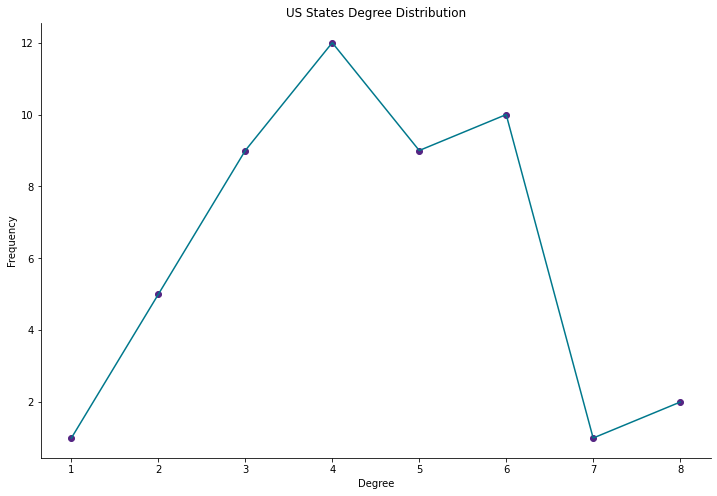

In [9]:
degree_distro(states_graph, 'US States')

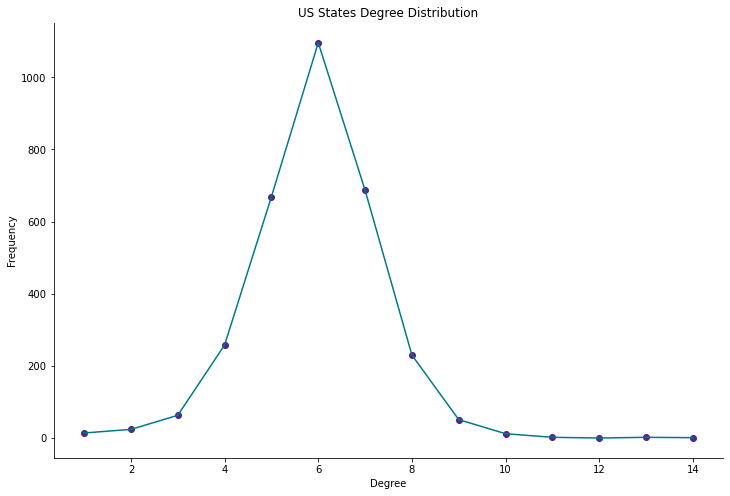

In [10]:
degree_distro(counties_graph, 'US States')